In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.analysis.noise_measurement

/home/local/lib/python2.7/site-packages/matplotlib/__init__.py:1155: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
:0: FutureWarning: IPython widgets are experimental and may change in the future.


updated file list


In [19]:
snm = kid_readout.analysis.noise_measurement.SweepNoiseMeasurement('/data/readout/2016-01-08_171459_sweep_and_stream.nc',sweep_group_index=3,
                                                                   timestream_group_index=6,resonator_index=9,delay_estimate=-31.3,
                                                                   dac_chain_gain=-56.
                                                              )

using NFFT: 2** 17.0
10


In [7]:
snm1 = kid_readout.analysis.noise_measurement.SweepNoiseMeasurement('/data/readout/2016-01-08_165510_sweep_and_stream.nc',sweep_group_index=3,
                                                                   timestream_group_index=6,resonator_index=9,delay_estimate=-31.3,
                                                                   dac_chain_gain=-56.
                                                              )

using NFFT: 2** 17.0
10


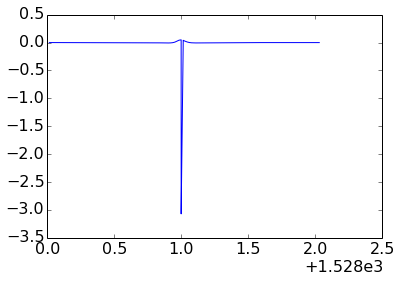

In [21]:
plot(snm.sweep_freqs_MHz,np.angle(snm.sweep_s21/snm1.sweep_s21))


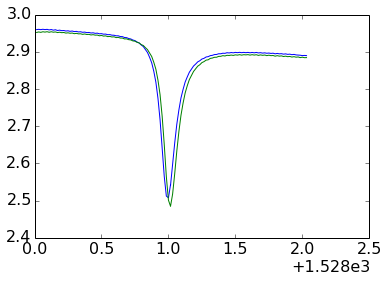

In [23]:
plot(snm.sweep_freqs_MHz,np.abs(snm.sweep_s21))
plot(snm1.sweep_freqs_MHz,np.abs(snm1.sweep_s21))


In [39]:
from kid_readout.analysis import khalil,resonator

In [40]:
res = resonator.Resonator(snm.sweep_freqs_MHz,snm.sweep_s21,errors = snm.sweep_errors, model=khalil.resonator_model,guess=khalil.resonator_guess)

In [41]:
res.A_slope

-0.030784633943966726

In [63]:
res.result.params['Q_e_real']

<Parameter 'Q_e_real', value=77463.301323651205 +/- 110, bounds=[0:1000000.0]>

In [64]:
snm.fit_params['Q_e_real']

<Parameter 'Q_e_real', value=74132.955543238291 +/- 1.03e+03, bounds=[0:1000000.0]>

In [65]:
res.Q_i

13569.117035369263

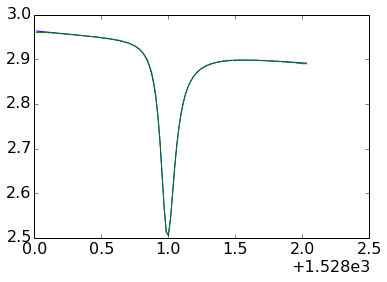

In [44]:
plot(snm.sweep_freqs_MHz,np.abs(res.model(x=snm.sweep_freqs_MHz)))
plot(snm.sweep_freqs_MHz,np.abs(snm.sweep_s21))

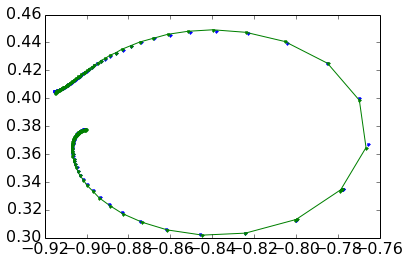

In [54]:
model = res.normalized_model(snm.sweep_freqs_MHz,remove_phase=False)
data = res.normalize(snm.sweep_freqs_MHz,snm.sweep_s21,remove_phase=False)
plot(model.real,model.imag,'.')
plot(data.real,data.imag,'.-')

In [45]:
res.f_0

1528.9879027791108

In [56]:
res.result.params['f_0'].value#/res.result.params['f_0'].stderr

1528.9879027791108

In [57]:
snm.fit_params['Q']

<Parameter 'Q', value=11471.335494507792 +/- 190, bounds=[758.58506731946136:inf]>

In [58]:
snm1.fit_params['Q']

<Parameter 'Q', value=11792.949998191894 +/- 190, bounds=[758.58518388995742:inf]>

In [29]:
1e6*20e3/1529e6

13.080444735120993

In [24]:
snm.sweep_primary_load_temperature,snm1.sweep_primary_load_temperature

(4.1670964094704, 1.5290437830524444)

In [30]:
snm.sweep_primary_package_temperature,snm1.sweep_primary_package_temperature

(0.1729399791355133, 0.16201218011722565)

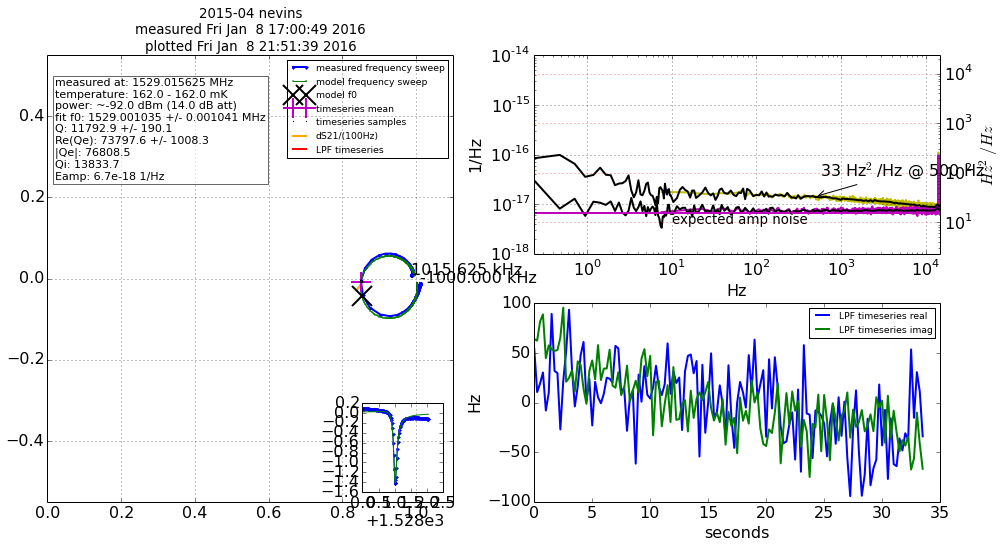

In [32]:
blah = snm1.plot()

In [37]:
1e6*np.sqrt(1e-18)/6e-6

166.66666666666666

In [38]:
_/np.sqrt(2)

117.85113019775791

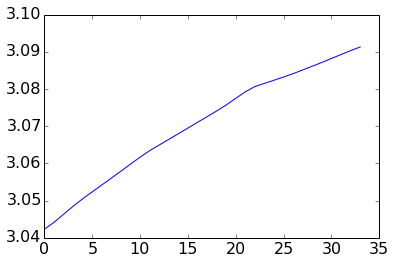

In [6]:
plot(snm.timestream_primary_load_temperature)

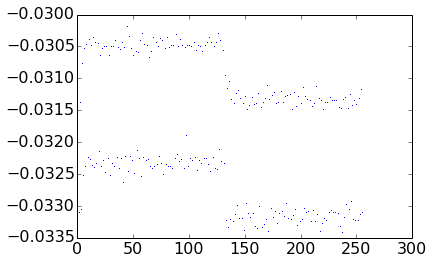

In [30]:
plot(snm.normalized_timeseries.reshape((-1,256)).mean(0).imag,',')

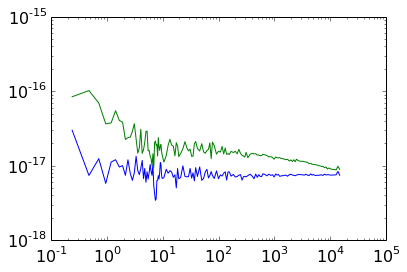

In [13]:
loglog(snm.pca_freq,snm.pca_eigvals.T)

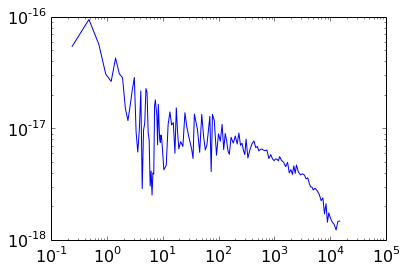

In [12]:
loglog(snm.pca_freq,snm.pca_eigvals[1,:]-snm.pca_eigvals[0,:])